In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential,Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
import tensorflow as tf

In [2]:
train_datagen=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
train_data=train_datagen.flow_from_directory(directory="dataset/train",target_size=(224,224),batch_size=1,class_mode="binary")

Found 10000 images belonging to 10 classes.


In [3]:
train_data.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [4]:
test_datagen=image.ImageDataGenerator(rescale=1/255)
test_data=train_datagen.flow_from_directory(directory="dataset/train",target_size=(224,224),batch_size=1,class_mode="binary")

Found 10000 images belonging to 10 classes.


In [5]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['acc'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [7]:
model.fit_generator(train_data,steps_per_epoch=10,epochs=10,validation_steps=2,validation_data=test_data)

<ipython-input-7-65ec7f029009>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=10,epochs=10,validation_steps=2,validation_data=test_data)


Epoch 1/10
10/10 [==============================] - 5s 303ms/step - loss: -40.2171 - acc: 0.1000 - val_loss: -476.5192 - val_acc: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 3s 262ms/step - loss: -1826.4694 - acc: 0.2000 - val_loss: -12192.9160 - val_acc: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 3s 262ms/step - loss: -129223.7656 - acc: 0.0000e+00 - val_loss: -830757.2500 - val_acc: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 3s 265ms/step - loss: -2296815.7500 - acc: 0.1000 - val_loss: -6190878.5000 - val_acc: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 3s 259ms/step - loss: -6684026.0000 - acc: 0.2000 - val_loss: -51909460.0000 - val_acc: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 3s 254ms/step - loss: -117626984.0000 - acc: 0.0000e+00 - val_loss: -58631764.0000 - val_acc: 0.5000
Epoch 7/10
10/10 [==============================] - 2s 246ms/step - loss: -422386112.0000 - acc: 0.1000 - va

In [8]:
path='dataset/val/Tomato___Tomato_mosaic_virus/0a91f50b-1263-4b2c-a8c1-f2a6025b82f3___PSU_CG 2136.jpg'
img=tf.keras.utils.load_img(path,target_size=(224,224))
img=tf.keras.utils.img_to_array(img)/255
img=np.array([img])
img.shape

(1, 224, 224, 3)

In [9]:
result=model.predict(img).astype("int32")
result

1/1 [==============================] - 0s 264ms/step


array([[1]])

In [10]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory="dataset/train"  , target_size=(224,224))

Found 10000 images belonging to 10 classes.


In [11]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= "dataset/val" , target_size=(224,224), shuffle= False)


Found 1000 images belonging to 10 classes.


In [12]:
train.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [13]:
class_type = {0:'Tomato___Bacterial_spot',  1 : 'Tomato___Early_blight',2:'Tomato___Late_blight',3:'Tomato___Leaf_Mold',4:'Tomato___Septoria_leaf_spot',5:'Tomato___Spider_mites Two-spotted_spider_mite',6:'Tomato___Target_Spot',7:'Tomato___Tomato_Yellow_Leaf_Curl_Virus',8:'Tomato___Tomato_mosaic_virus',9:'Tomato___healthy'}

In [14]:
t_img , label = train.next()

In [15]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


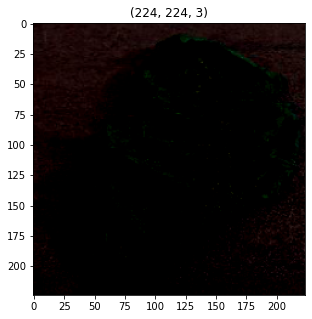

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


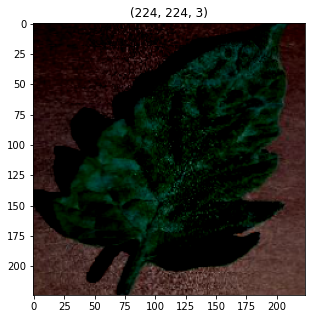

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


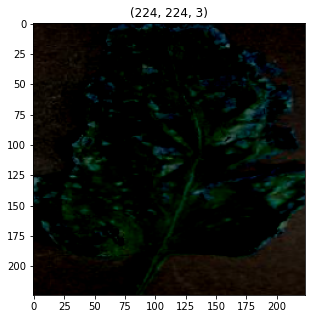

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


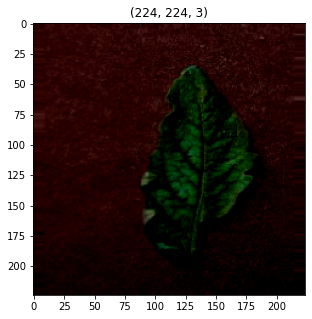

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


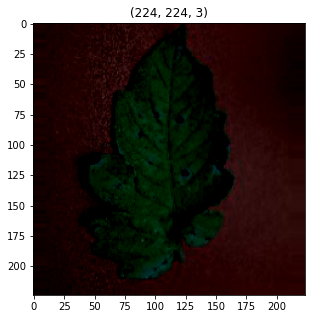

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


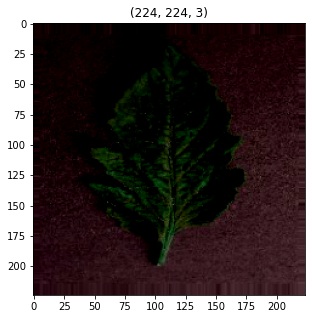

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


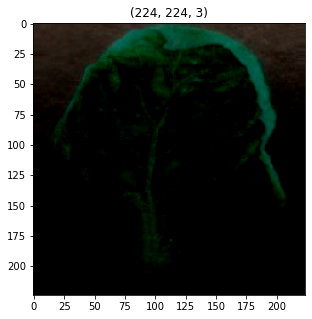

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


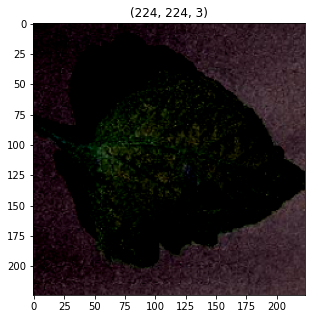

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


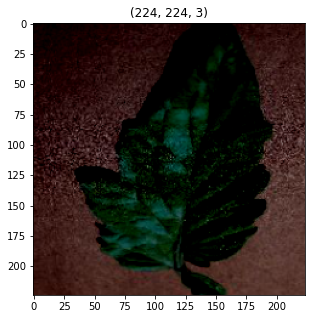

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


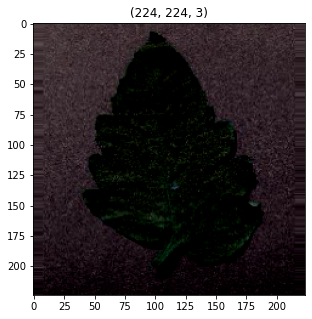

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


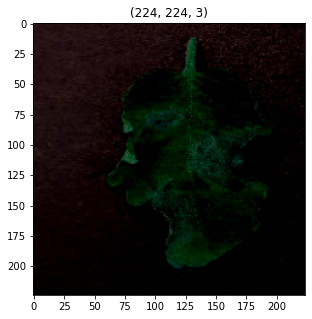

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


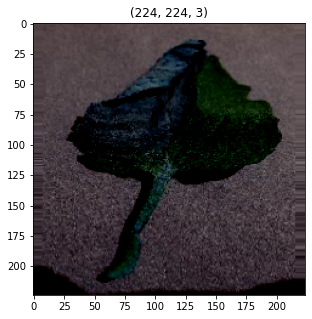

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


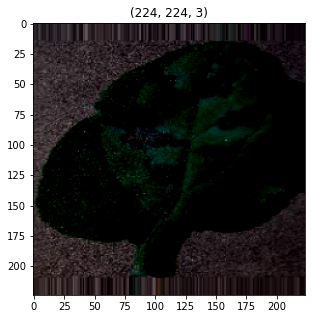

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


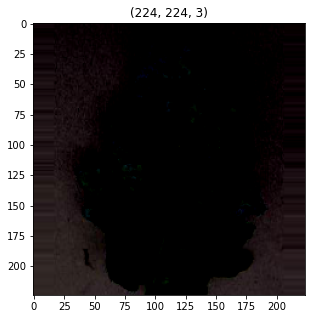

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


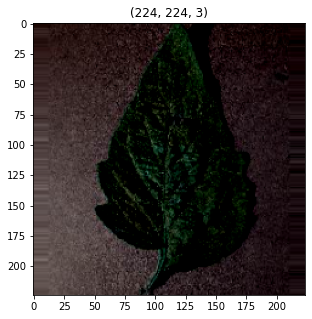

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


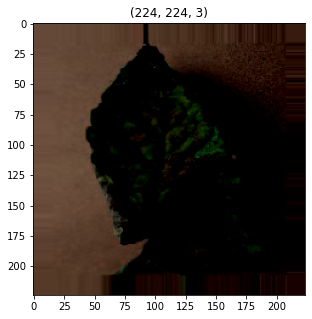

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


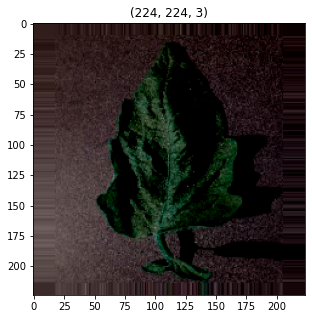

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


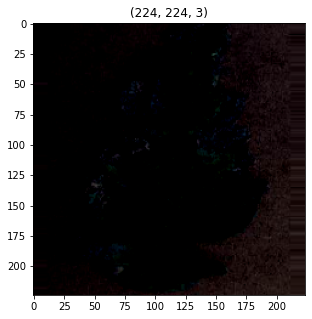

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


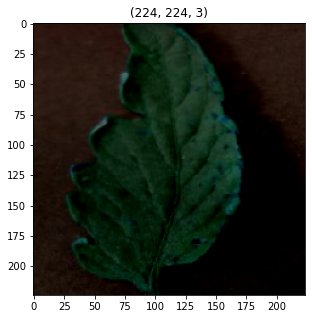

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


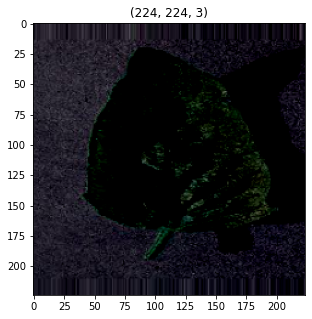

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


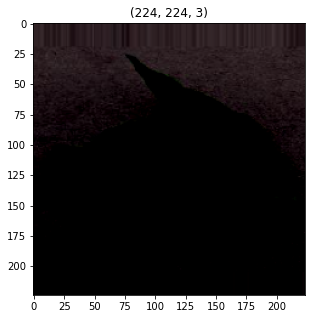

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


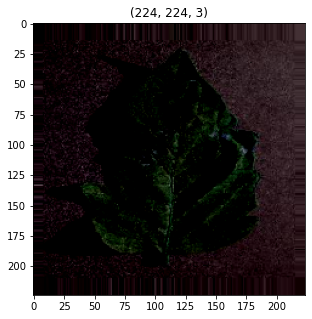

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


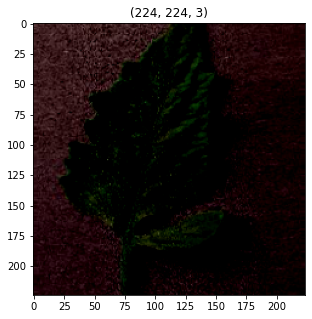

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


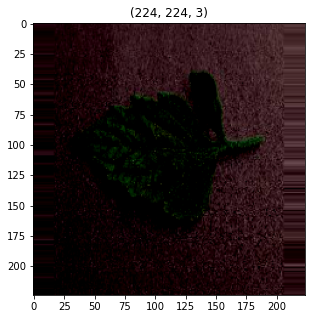

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


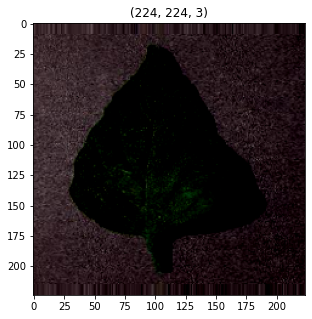

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


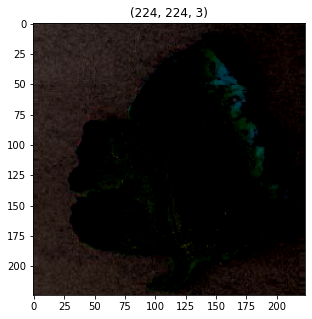

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


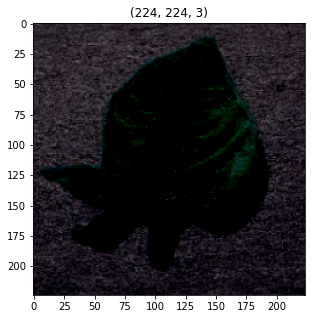

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


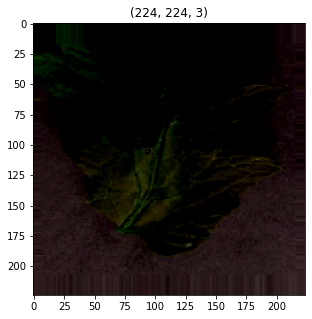

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


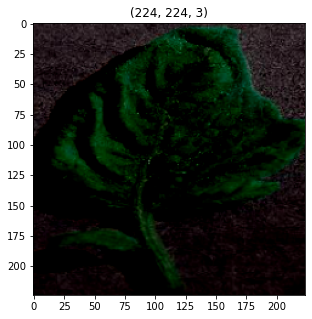

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


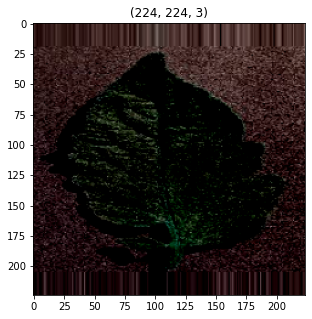

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


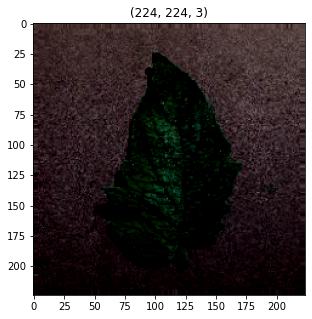

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


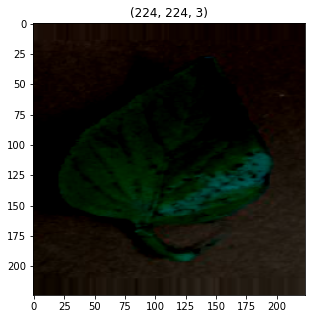

In [16]:
plotImages(t_img, label)

In [17]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [18]:
vgg = VGG16( input_shape=(224,224,3), include_top= False)

In [19]:
for layer in vgg.layers:          
  layer.trainable = False

In [20]:
x = Flatten()(vgg.output)
x = Dense(units=10 , activation='sigmoid', name = 'predictions' )(x)
model = Model(vgg.input, x)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [23]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [24]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30,  validation_steps= 32, callbacks=[es,mc])

<ipython-input-24-b8caf4142e0a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30,  validation_steps= 32, callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - 66s 6s/step - loss: 3.0694 - accuracy: 0.2000
Epoch 2/30
10/10 [==============================] - 65s 6s/step - loss: 1.8626 - accuracy: 0.3812
Epoch 3/30
10/10 [==============================] - 66s 6s/step - loss: 1.4322 - accuracy: 0.5531
Epoch 4/30
10/10 [==============================] - 69s 7s/step - loss: 1.1676 - accuracy: 0.6187
Epoch 5/30
10/10 [==============================] - 67s 7s/step - loss: 1.0674 - accuracy: 0.6406
Epoch 6/30
10/10 [==============================] - 63s 6s/step - loss: 0.9199 - accuracy: 0.7138
Epoch 7/30
10/10 [==============================] - 66s 6s/step - loss: 0.8327 - accuracy: 0.7125
Epoch 8/30
10/10 [==============================] - 67s 7s/step - loss: 0.7912 - accuracy: 0.7594
Epoch 9/30
10/10 [==============================] - 67s 7s/step - loss: 0.8611 - accuracy: 0.7188
Epoch 10/30
10/10 [==============================] - 67s 7s/step - loss: 0.6751 - accuracy: 0.7594
Epoch 11/30
10/10 [

10/10 [==============================] - 54s 5s/step - loss: 0.6200 - accuracy: 0.7937
Epoch 22/30
10/10 [==============================] - 57s 6s/step - loss: 0.4622 - accuracy: 0.8719
Epoch 23/30
10/10 [==============================] - 58s 6s/step - loss: 0.4933 - accuracy: 0.8562
Epoch 24/30
10/10 [==============================] - 56s 6s/step - loss: 0.6075 - accuracy: 0.7969
Epoch 25/30
10/10 [==============================] - 57s 6s/step - loss: 0.5843 - accuracy: 0.7969
Epoch 26/30
10/10 [==============================] - 54s 5s/step - loss: 0.4708 - accuracy: 0.8406
Epoch 27/30
10/10 [==============================] - 58s 6s/step - loss: 0.5030 - accuracy: 0.8281
Epoch 28/30
10/10 [==============================] - 55s 6s/step - loss: 0.4431 - accuracy: 0.8469
Epoch 29/30
10/10 [==============================] - 53s 5s/step - loss: 0.4855 - accuracy: 0.8469
Epoch 30/30
10/10 [==============================] - 54s 5s/step - loss: 0.5377 - accuracy: 0.8094


In [25]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy'])

In [41]:
# acc = model.evaluate_generator(generator= test) 
# print(f"The accuracy of your model is = {acc} %")
loss, acc = model.evaluate_generator(test, steps=3, verbose=0)
print('loss: ', loss, 'accuracy: ', acc)

<ipython-input-41-f613b18995a0>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(test, steps=3, verbose=0)


loss:  0.4907248020172119 accuracy:  0.8333333134651184


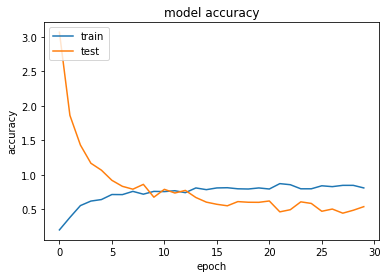

In [43]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = tf.keras.utils.load_img(path, target_size=(224,224,3))
  img = tf.keras.utils.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

1/1 [==============================] - 0s 263ms/step
The given image is of type = Tomato___Tomato_mosaic_virus



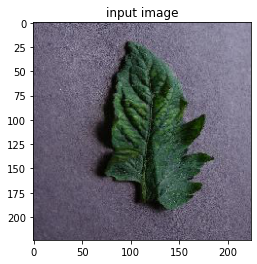

In [45]:
path = "dataset/val/Tomato___Tomato_mosaic_virus/0a91f50b-1263-4b2c-a8c1-f2a6025b82f3___PSU_CG 2136.jpg"       

res = class_type[np.argmax(model.predict(img))]
print(f"The given image is of type = {res}")
print()
# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

In [51]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [52]:
import matplotlib.cm as cm
from IPython.display import Image, display

In [53]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded 
    """

    # Load the original image
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)

    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [54]:
def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """
  
  
  a=0.0
  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given image is of type = {res}")
  print(type(res))
  print()
 

  print()
  print("image with heatmap representing the disease spot")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

1/1 [==============================] - 0s 171ms/step
The given image is of type = Tomato___Late_blight
<class 'str'>


image with heatmap representing the disease spot


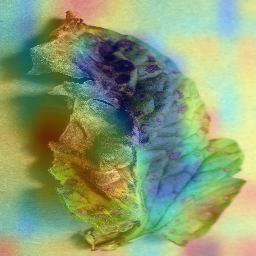


the original input image



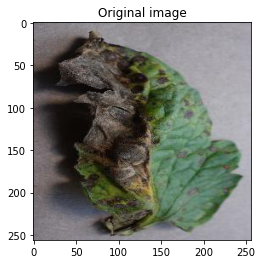

In [57]:
path = "dataset/val/Tomato___Early_blight/Tomato___Early_blight_original_0b494c44-8cd0-4491-bdfd-8a354209c3ae___RS_Erly.B 9561.JPG_88d1352d-7d36-43c9-9c2f-bbee88909174.jpg"
image_prediction_and_visualization(path)

In [58]:
from keras.models import load_model
model.save('model_vgg16.h5')